In [6]:
import pandas as pd

In [7]:
df= pd.read_csv(r"C:\Users\saman\Desktop\Beta Lactamase\beta_lactamase_bioactivity_data_curated.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,12055.0,inactive
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,4712.0,intermediate
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,7828.0,intermediate
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,11190.0,inactive
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,4186.0,intermediate
...,...,...,...,...
652,CHEMBL1546134,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1,49751.0,inactive
653,CHEMBL1309228,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...,49751.0,inactive
654,CHEMBL1401040,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...,49756.0,inactive
655,CHEMBL1736766,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3,49806.0,inactive


In [8]:
df1= df.drop(columns='canonical_smiles')

In [10]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [11]:
df_clean_smiles = pd.concat([df1,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1555532,12055.0,inactive,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...
1,CHEMBL61559,4712.0,intermediate,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1
2,CHEMBL1494120,7828.0,intermediate,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...
3,CHEMBL1698008,11190.0,inactive,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1
4,CHEMBL1964993,4186.0,intermediate,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1
...,...,...,...,...
652,CHEMBL1546134,49751.0,inactive,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1
653,CHEMBL1309228,49751.0,inactive,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...
654,CHEMBL1401040,49756.0,inactive,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...
655,CHEMBL1736766,49806.0,inactive,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3


Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

1) Molecular weight < 500 Dalton
2) Octanol-water partition coefficient (LogP) < 5
3) Hydrogen bond donors < 5
4) Hydrogen bond acceptors < 10

Calculate Descriptors

In [16]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

def lipinski(smiles, verbose=False):
    baseData = []  # List of lists
    i = 0  
    
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        if mol is not None:
            mw = Descriptors.MolWt(mol)
            logp = Descriptors.MolLogP(mol)
            h_donors = Descriptors.NumHDonors(mol)
            h_acceptors = Descriptors.NumHAcceptors(mol)

            baseData.append([mw, logp, h_donors, h_acceptors])  # Append as a list

            if verbose:
                print(f"{i}: Processed {elem} -> MW: {mw}, LogP: {logp}, HDonors: {h_donors}, HAcceptors: {h_acceptors}")
        i += 1

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)  # Ensure 2D structure
    
    return descriptors


In [18]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles.tolist())
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,347.308,2.34858,0,7
1,311.381,3.66590,0,4
2,419.717,4.27770,1,4
3,267.262,2.32902,0,5
4,257.249,3.29890,1,5
...,...,...,...,...
652,334.404,3.48990,1,5
653,403.372,2.40530,0,9
654,459.355,2.67182,1,6
655,325.273,-2.22630,6,8


In [19]:
df


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,12055.0,inactive
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,4712.0,intermediate
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,7828.0,intermediate
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,11190.0,inactive
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,4186.0,intermediate
...,...,...,...,...
652,CHEMBL1546134,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1,49751.0,inactive
653,CHEMBL1309228,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...,49751.0,inactive
654,CHEMBL1401040,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...,49756.0,inactive
655,CHEMBL1736766,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3,49806.0,inactive


In [20]:
df_combined= pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,12055.0,inactive,347.308,2.34858,0,7
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,4712.0,intermediate,311.381,3.66590,0,4
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,7828.0,intermediate,419.717,4.27770,1,4
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,11190.0,inactive,267.262,2.32902,0,5
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,4186.0,intermediate,257.249,3.29890,1,5
...,...,...,...,...,...,...,...,...
652,CHEMBL1546134,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1,49751.0,inactive,334.404,3.48990,1,5
653,CHEMBL1309228,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...,49751.0,inactive,403.372,2.40530,0,9
654,CHEMBL1401040,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...,49756.0,inactive,459.355,2.67182,1,6
655,CHEMBL1736766,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3,49806.0,inactive,325.273,-2.22630,6,8


Convert IC50 to pIC50

In [21]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [22]:
df_combined.standard_value.describe()

count      657.000000
mean     23320.488615
std      20533.306419
min         33.940000
25%       5265.000000
50%      12984.000000
75%      49743.000000
max      62430.000000
Name: standard_value, dtype: float64

In [23]:
-np.log10( (10**-9)* 100000000 )

1.0

In [26]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [34]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value_norm', axis=1)

        
    return x

In [29]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,inactive,347.308,2.34858,0,7,12055.0
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,intermediate,311.381,3.66590,0,4,4712.0
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,intermediate,419.717,4.27770,1,4,7828.0
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,inactive,267.262,2.32902,0,5,11190.0
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,intermediate,257.249,3.29890,1,5,4186.0
...,...,...,...,...,...,...,...,...
652,CHEMBL1546134,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1,inactive,334.404,3.48990,1,5,49751.0
653,CHEMBL1309228,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...,inactive,403.372,2.40530,0,9,49751.0
654,CHEMBL1401040,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...,inactive,459.355,2.67182,1,6,49756.0
655,CHEMBL1736766,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3,inactive,325.273,-2.22630,6,8,49806.0


In [30]:
df_norm.standard_value_norm.describe()

count      657.000000
mean     23320.488615
std      20533.306419
min         33.940000
25%       5265.000000
50%      12984.000000
75%      49743.000000
max      62430.000000
Name: standard_value_norm, dtype: float64

In [36]:
def pIC50(input):
    pIC50 = []
    
    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Convert nanomolar to molar
        pIC50.append(-np.log10(molar))  # Calculate pIC50
    
    input['pIC50'] = pIC50  # Add new column
    x = input.drop('standard_value_norm', axis=1)  # Corrected drop method

    return x


In [38]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,inactive,347.308,2.34858,0,7,4.918833
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,intermediate,311.381,3.66590,0,4,5.326795
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,intermediate,419.717,4.27770,1,4,5.106349
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,inactive,267.262,2.32902,0,5,4.951170
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,intermediate,257.249,3.29890,1,5,5.378201
...,...,...,...,...,...,...,...,...
652,CHEMBL1546134,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1,inactive,334.404,3.48990,1,5,4.303198
653,CHEMBL1309228,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...,inactive,403.372,2.40530,0,9,4.303198
654,CHEMBL1401040,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...,inactive,459.355,2.67182,1,6,4.303155
655,CHEMBL1736766,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3,inactive,325.273,-2.22630,6,8,4.302718


In [39]:
df_final.pIC50.describe()

count    657.000000
mean       4.882692
std        0.539974
min        4.204607
25%        4.303268
50%        4.886591
75%        5.278602
max        7.469288
Name: pIC50, dtype: float64

In [40]:
df_final.to_csv('beta_lactamase_bioactivity_data_class_pIC50.csv')

Removing the intermediate bioactivity class

In [41]:
df2= df_final[df_final['class'] != 'intermediate']
df2

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,inactive,347.308,2.34858,0,7,4.918833
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,inactive,267.262,2.32902,0,5,4.951170
6,CHEMBL1497139,N#CC(C#N)=C1C=CC=CN1/C(=C\c1ccco1)C(=O)c1ccc(B...,inactive,418.250,4.95266,0,5,4.877882
9,CHEMBL1698608,CC(=NNC(=S)N1CCN(c2ccccn2)CC1)c1nccs1,inactive,346.485,1.95880,1,6,4.302928
12,CHEMBL1575428,Cc1ccc(Cl)c(NC(=O)COC(=O)c2ccccc2C(=O)c2ccc(Cl...,inactive,521.740,5.88992,1,6,4.303120
...,...,...,...,...,...,...,...,...
652,CHEMBL1546134,CC1=NNC(=O)/C1=C\c1cn(-c2ccccc2)nc1-c1cccs1,inactive,334.404,3.48990,1,5,4.303198
653,CHEMBL1309228,CS(=O)(=O)c1ccc(C(=O)OCc2nnc(-c3ccccc3)o2)cc1[...,inactive,403.372,2.40530,0,9,4.303198
654,CHEMBL1401040,Cc1ccc(NC(=O)Cn2ncc(Cl)c(Cl)c2=O)cc1S(=O)(=O)N...,inactive,459.355,2.67182,1,6,4.303155
655,CHEMBL1736766,O=C1NC2C(O)C(O)C(O)C(O)C2c2cc3c(c(O)c21)OCO3,inactive,325.273,-2.22630,6,8,4.302718


Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [50]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

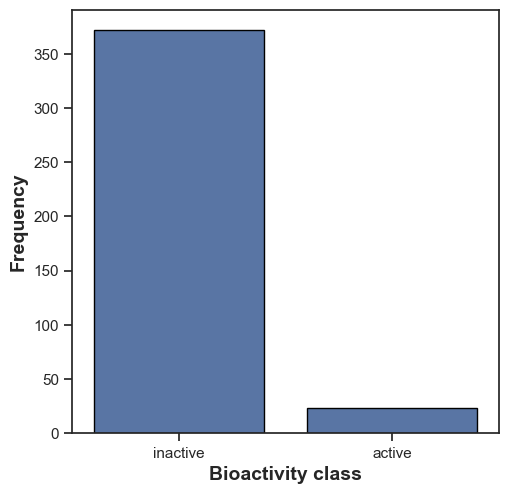

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df2, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP

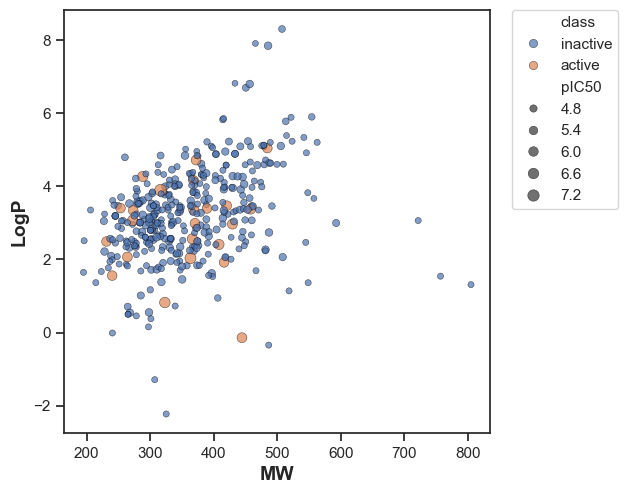

In [56]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df2, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.savefig('plot_MW_vs_LogP.pdf')

Box Plots

Text(0, 0.5, 'pIC50 value')

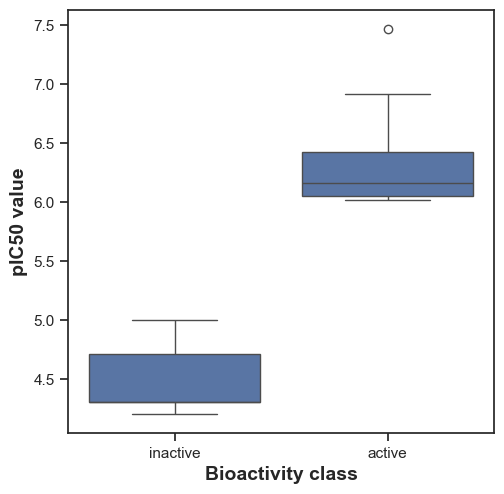

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#plt.savefig('plot_ic50.pdf')
     